In [102]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.compose import ColumnTransformer 

In [103]:
#import dataset only
df=pd.read_csv('data_science_job.csv')

(df.head())

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [104]:
#check for missing in counts and in percentage also
print(df.isnull().sum(),"\n\n")

print(df.isnull().mean()*100)

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64 


enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64


In [105]:
less_li=[]
more_li=[]
n0_li=[]

for var in df.columns:
    if df[var].isnull().mean()==0 :
        n0_li.append(var)
    elif(df[var].isnull().mean()<0.06 and df[var].isnull().mean()>0):
        li.append(var)
    else:
        more_li.append(var)
print(n0_li,more_li,less_li)

['enrollee_id', 'city', 'relevent_experience', 'target'] ['gender', 'major_discipline', 'company_size', 'company_type'] []


In [106]:
#handling missing values 
#option 1 : CCA  on data_science dataset for column with 5% missing values

In [107]:
#this is be the remaining % of data we will have after droppoing

len(df[li].dropna())/len(df[li])

0.8968577095730244

In [108]:
new_df=df[li].dropna()
new_df.shape

(17182, 20)

In [109]:
print(new_df.isnull().mean()*100)

city_development_index    0.0
enrolled_university       0.0
education_level           0.0
experience                0.0
training_hours            0.0
city_development_index    0.0
enrolled_university       0.0
education_level           0.0
experience                0.0
training_hours            0.0
city_development_index    0.0
enrolled_university       0.0
education_level           0.0
experience                0.0
training_hours            0.0
city_development_index    0.0
enrolled_university       0.0
education_level           0.0
experience                0.0
training_hours            0.0
dtype: float64


In [110]:
#handling missing values 
#option 1 : CCA done already on data_science dataset
#option 2: Imputing

In [111]:
#import data set lets use titanic dataset only
df=pd.read_csv('titanic_toy.csv')
print(df.head())

    Age     Fare  Family  Survived
0  22.0   7.2500       1         0
1  38.0  71.2833       1         1
2  26.0   7.9250       0         1
3  35.0  53.1000       1         1
4  35.0   8.0500       0         0


In [112]:
print(df.isnull().sum(),"\n\n")

print(df.isnull().mean()*100)
df.shape

Age         177
Fare         45
Family        0
Survived      0
dtype: int64 


Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64


(891, 4)

In [113]:
new_df=df.dropna()
new_df.shape

(675, 4)

In [114]:
len(new_df)/len(df)

0.7575757575757576

<Axes: xlabel='Age', ylabel='Count'>

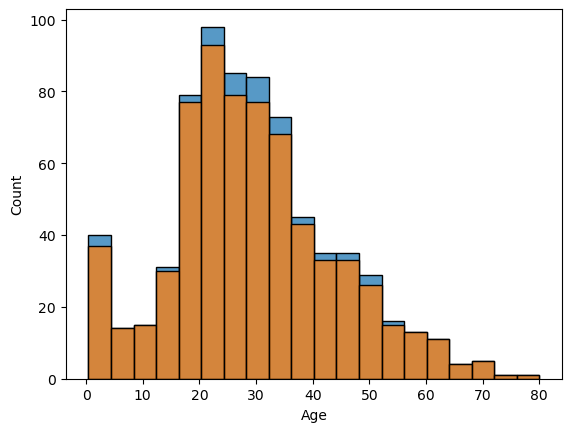

In [115]:
sns.histplot(df['Age'])
sns.histplot(new_df['Age'])


<Axes: xlabel='Family', ylabel='Count'>

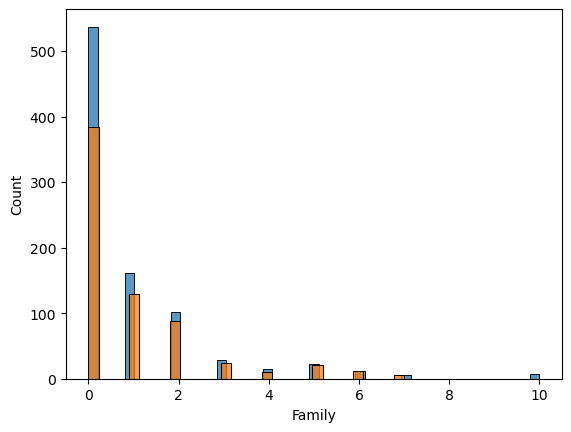

In [116]:
sns.histplot(df['Family'])
sns.histplot(new_df['Family'])

In [117]:
#impute methods in this


In [122]:
# Mean_Imputer= SimpleImputer(strategy='mean')
# Median_Imputer=SimpleImputer(strategy='median')

trnf=ColumnTransformer([
    ('meanImputer',SimpleImputer(strategy='mean'),['Age','Family'])
],remainder='passthrough')

new_df2=pd.DataFrame(trnf.fit_transform(df))


In [123]:
print(new_df2.shape)
print(df.shape)

(891, 4)
(891, 4)


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_6084\2026309603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Family'])
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_6084\2026309603.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df2[2])


<Axes: xlabel='2', ylabel='Density'>

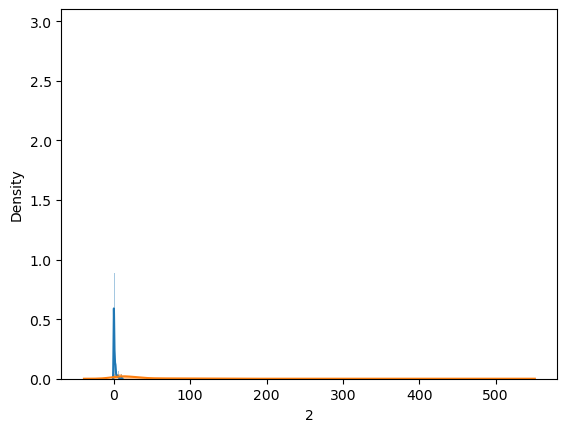

In [158]:
sns.distplot(df['Family'])
sns.distplot(new_df2[2])

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_6084\3996807302.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_6084\3996807302.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df2[0])


<Axes: xlabel='0', ylabel='Density'>

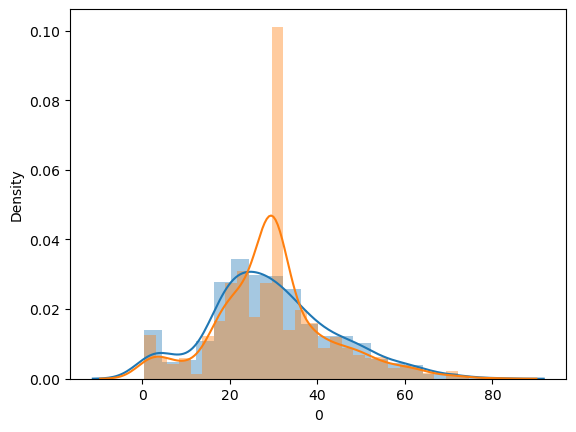

In [159]:
sns.distplot(df['Age'])
sns.distplot(new_df2[0])

In [160]:
df.corr()['Family']


Age        -0.301914
Fare        0.212626
Family      1.000000
Survived    0.016639
Name: Family, dtype: float64

In [161]:
new_df2.corr()[2]

0    0.094681
1    0.212626
2    1.000000
3    0.263920
Name: 2, dtype: float64

In [162]:
#arbitrary fillups
trnf=ColumnTransformer([
    ('meanImputer',SimpleImputer(strategy='constant',fill_value=-1),['Age','Family'])
],remainder='passthrough')

new_df3=pd.DataFrame(trnf.fit_transform(df))

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_6084\2912501246.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_6084\2912501246.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df3[0])


<Axes: xlabel='0', ylabel='Density'>

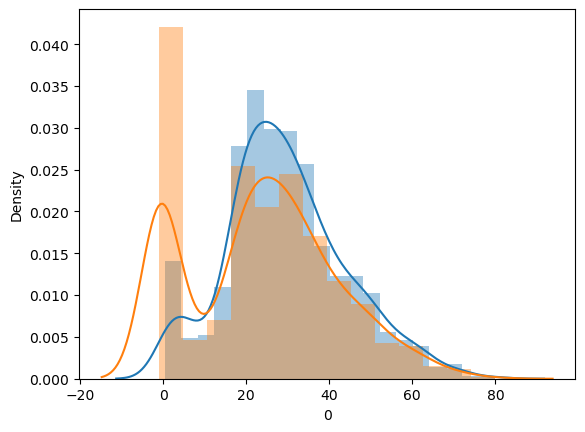

In [163]:


sns.distplot(df['Age'])
sns.distplot(new_df3[0])

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_6084\3160957134.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Family'])
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_6084\3160957134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df3[2])


<Axes: xlabel='2', ylabel='Density'>

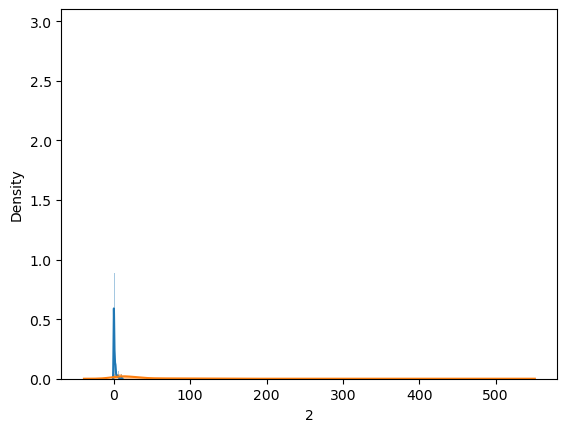

In [164]:
sns.distplot(df['Family'])
sns.distplot(new_df3[2])